# Asteroides Diameter Predictor

## Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 50) # To see all the columns of dataset

## Import DataSet

In [3]:
dataset = pd.read_csv('Asteroid_Updated.csv', low_memory=False)  # To Read dataset and as some colums have mixed datatype so using 'low_memory = False'
dataset.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [4]:
# Shape of Dataset
print("Number of Rows :-> ", dataset.shape[0])
print("Number of Columns :-> ", dataset.shape[1])


Number of Rows :->  839714
Number of Columns :->  31


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [6]:
# Segregate Data into numeric and categorical onces
categorical, numeric = [], []
for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        categorical.append(ele)
    else:
        numeric.append(ele)
print("Categorical Data : ", categorical)
print("Numeric Data : ", numeric)

Categorical Data :  ['name', 'condition_code', 'neo', 'pha', 'diameter', 'extent', 'spec_B', 'spec_T', 'class']
Numeric Data :  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'G', 'moid', 'n', 'per', 'ma']


In [7]:
# As Diameter is not categorical variable but is interpreted as categorical vairable so removing diameter from categorical array
categorical.remove('diameter')

## Feature Engineering & Exploratory Data Analysis

### 1) Univariate Analysis

### For Numeric Data

In [8]:
dataset.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,837025.000000,136409.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,16.786249,0.130067,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,1.821574,0.109994,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


### For Categorical Data

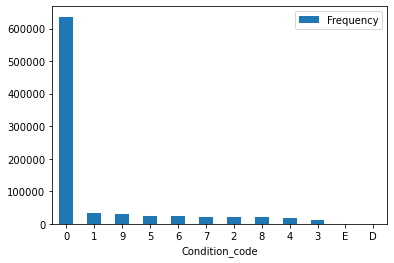

In [9]:
condition_c = dataset['condition_code'].value_counts()
condition_c = pd.DataFrame({"Frequency":condition_c})
condition_c['Condition_code'] = condition_c.index
condition_c.plot.bar(x='Condition_code', y='Frequency', rot=0)
plt.show()

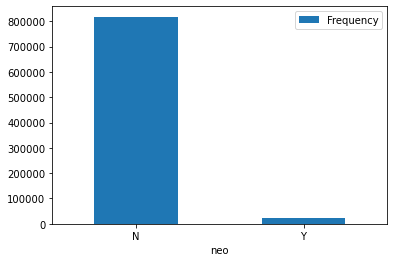

In [10]:
neo = dataset['neo'].value_counts()
neo = pd.DataFrame({"Frequency":neo})
neo['neo'] = neo.index
neo.plot.bar(x='neo', y='Frequency', rot=0)
plt.show()

Majority of values are 'N'

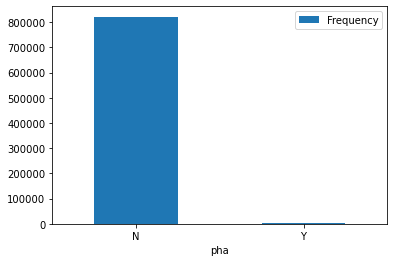

In [11]:
pha = dataset['pha'].value_counts()
pha = pd.DataFrame({"Frequency":pha})
pha['pha'] = pha.index
pha.plot.bar(x='pha', y='Frequency', rot=0)
plt.show()

'Y' is almost Nill as compare to 'N'

<Figure size 864x576 with 0 Axes>

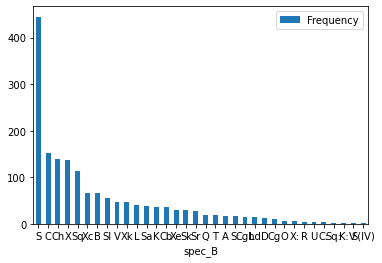

In [12]:
plt.figure(figsize=(12,8))
spec_B = dataset['spec_B'].value_counts()
spec_B = pd.DataFrame({"Frequency":spec_B})
spec_B['spec_B'] = spec_B.index
spec_B.plot.bar(x='spec_B', y='Frequency', rot=0)
plt.show()

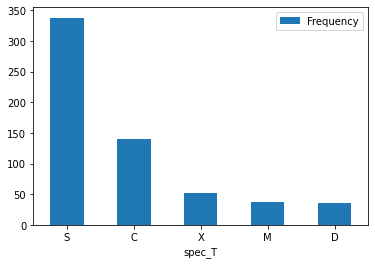

In [13]:
spec_T = dataset['spec_T'].value_counts()[:5]
spec_T = pd.DataFrame({"Frequency":spec_T})
spec_T['spec_T'] = spec_T.index
spec_T.plot.bar(x='spec_T', y='Frequency', rot=0)
plt.show()

### 2) Bivariate Analysis

### Bivariate Analysis for Numeric Data

### Finding Correlation Between features

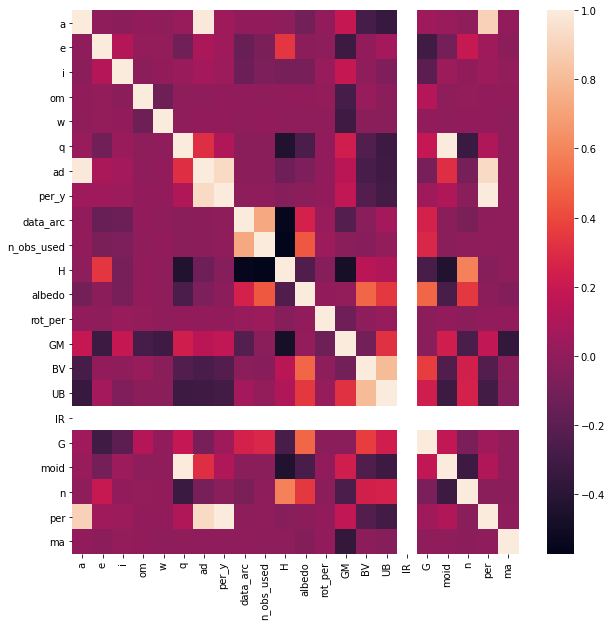

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())
plt.show()

In [15]:
num_corr = {}

In [16]:
def corr_max(feature):
    dicto = dict(dataset.corrwith(dataset[feature]))

    for key, val in dicto.items():
        if (val > 0.97 or val < -0.97) and (feature != key):
            num_corr[feature] = key
            print(feature,"---->", key)

In [17]:
print("Heavy Correlation is between : ")
for col in numeric:
    corr_max(col)

Heavy Correlation is between : 
a ----> ad
q ----> moid
ad ----> a
per_y ----> per
moid ----> q
per ----> per_y


### Bivariate Analysis for Categorical Data

### Chi-Square Test for relationship between categorical data

In [18]:
print("Categorical Data : ", categorical)

Categorical Data :  ['name', 'condition_code', 'neo', 'pha', 'extent', 'spec_B', 'spec_T', 'class']


In [19]:
test_corr_cat = categorical.copy()
test_corr_cat.remove('name')
print("Categories for correlation test : ", test_corr_cat) 

Categories for correlation test :  ['condition_code', 'neo', 'pha', 'extent', 'spec_B', 'spec_T', 'class']


In [20]:
cat_corr = {}

In [21]:
def cat_correlation(feature1, feature2):
    crosstab = pd.crosstab(dataset[feature1], dataset[feature2])
    p_value = stats.chi2_contingency(crosstab)[1]

    if p_value < 0.05:
        cat_corr[feature1] = feature2
        print(feature1, " is Related to ", feature2, "with p-value : ", p_value)

In [22]:
for ind1 in range(len(test_corr_cat)):
    for ind2 in range(ind1+1, len(test_corr_cat)):
        cat_correlation(test_corr_cat[ind1], test_corr_cat[ind2])

condition_code  is Related to  neo with p-value :  0.0
condition_code  is Related to  pha with p-value :  1.0312155367979149e-199
condition_code  is Related to  spec_B with p-value :  1.5849916756916413e-96
condition_code  is Related to  spec_T with p-value :  2.8792242695344553e-43
condition_code  is Related to  class with p-value :  0.0
neo  is Related to  pha with p-value :  0.0
neo  is Related to  spec_B with p-value :  1.0784031329999345e-66
neo  is Related to  spec_T with p-value :  1.0549449724674979e-13
neo  is Related to  class with p-value :  0.0
pha  is Related to  spec_B with p-value :  1.3109230338722967e-22
pha  is Related to  spec_T with p-value :  9.1499734851376e-05
pha  is Related to  class with p-value :  0.0
spec_B  is Related to  spec_T with p-value :  1.331145733430803e-216
spec_B  is Related to  class with p-value :  2.0145187772655847e-99
spec_T  is Related to  class with p-value :  4.3217214624777004e-72


Almost all categories are related to each other except 'extent'

## Handling Missing Values

In [23]:
# All Missing Values
dataset.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

### Treating Categorical Missing Values

In [24]:
# Categorical Missing Values
for feature in categorical:
    missing = dataset[feature].isnull().sum()
    if missing > 0:
        print(feature, " ---> ", missing)

name  --->  817747
condition_code  --->  867
neo  --->  6
pha  --->  16442
extent  --->  839696
spec_B  --->  838048
spec_T  --->  838734


In [25]:
# Categories with more NaN values then Non-NaN values

remove_cat = []
max_len = dataset.shape[0]

for ele in categorical:
    null = len(dataset[ele][dataset[ele].isnull()==True])
    not_null = len(dataset[ele][dataset[ele].isnull()==False])

    if null > not_null:
        print("Percentage of NaN values for", ele, " : ", null*100//max_len, "%")
        remove_cat.append(ele)


Percentage of NaN values for name  :  97 %
Percentage of NaN values for extent  :  99 %
Percentage of NaN values for spec_B  :  99 %
Percentage of NaN values for spec_T  :  99 %


In [26]:
dataset.drop(remove_cat, axis=1, inplace=True)

In [27]:
# Filling missing values of remaining categories with Mode
dataset['condition_code'].fillna(dataset['condition_code'].mode()[0], inplace=True)
dataset['neo'].fillna(dataset['neo'].mode()[0], inplace=True)
dataset['pha'].fillna(dataset['pha'].mode()[0], inplace=True)


### Treating Numeric Missing Values

In [28]:
# Numeric Missing Values

missing_num = []
for feature in numeric:
    missing = dataset[feature].isnull().sum()
    if missing > 0:
        print(feature, " ---> ", missing)
        missing_num.append(feature)

a  --->  2
ad  --->  6
per_y  --->  1
data_arc  --->  15474
H  --->  2689
albedo  --->  703305
rot_per  --->  820918
GM  --->  839700
BV  --->  838693
UB  --->  838735
IR  --->  839713
G  --->  839595
moid  --->  16442
n  --->  2
per  --->  6
ma  --->  8


In [29]:
# Numeric with more NaN values then Non-NaN values

remove_num = []
max_len = dataset.shape[0]

for ele in numeric:
    null = len(dataset[ele][dataset[ele].isnull()==True])
    not_null = len(dataset[ele][dataset[ele].isnull()==False])

    if null > not_null:
        print("Percentage of NaN values for", ele, " : ", null*100//max_len, "%")
        remove_num.append(ele)

Percentage of NaN values for albedo  :  83 %
Percentage of NaN values for rot_per  :  97 %
Percentage of NaN values for GM  :  99 %
Percentage of NaN values for BV  :  99 %
Percentage of NaN values for UB  :  99 %
Percentage of NaN values for IR  :  99 %
Percentage of NaN values for G  :  99 %


In [30]:
dataset.drop(remove_num, axis=1, inplace=True)

In [31]:
remain_miss_num = [x for x in missing_num if x not in remove_num]
print("Remaining Row with Missing Values ", remain_miss_num)

Remaining Row with Missing Values  ['a', 'ad', 'per_y', 'data_arc', 'H', 'moid', 'n', 'per', 'ma']


In [32]:
dataset['data_arc'].value_counts()[:10]

2.0     9297
1.0     7907
3.0     6069
8.0     4249
4.0     4201
5.0     4181
9.0     3593
6.0     3333
7.0     3328
10.0    2892
Name: data_arc, dtype: int64

In [33]:
dataset['H'].value_counts()[:10]

16.800    24097
16.500    24006
16.600    23683
16.700    23642
16.900    23560
          ...  
17.794       50
17.228       50
17.655       50
17.410       50
10.000       50
Name: H, Length: 455, dtype: int64

#### Some values are very common in 'data_arc' and 'H' so treat the missing values of this two columns with mean of first 10 most occuring values

In [34]:
def fill_na(feature):
    dataset[feature].fillna(dataset[feature].mean(), inplace=True)

In [35]:
for ele in remain_miss_num:
    if ele not in ['data_arc','H']:
        fill_na(ele)

In [36]:
most_data_arc = dict(dataset['data_arc'].value_counts()[:10])
print("Top 10 most occuring values of feature 'data_arc' : ", most_data_arc.keys())

Top 10 most occuring values of feature 'data_arc' :  dict_keys([2.0, 1.0, 3.0, 8.0, 4.0, 5.0, 9.0, 6.0, 7.0, 10.0])


In [37]:
mean = sum(list(most_data_arc.keys()))//10
dataset['data_arc'].fillna(mean, inplace=True)

In [38]:
H_list = list(dict(dataset['H'].value_counts().sort_values(ascending=False)).keys())
print("Top 10 most occuring values of feature 'H' : ", H_list[:10])

Top 10 most occuring values of feature 'H' :  [16.8, 16.5, 16.6, 16.7, 16.9, 16.4, 17.0, 17.1, 16.3, 16.2]


In [39]:
mean_H = sum(H_list[:10])//10
dataset['H'].fillna(mean_H, inplace=True)

In [40]:
dataset.isnull().sum()

a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc               0
condition_code         0
n_obs_used             0
H                      0
neo                    0
pha                    0
diameter          702078
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

### As 'diameter' is target variable its missing values needs to be droped

In [41]:
print('Number of Non-Null values in diameter :-> ', len(dataset['diameter'][dataset['diameter'].isnull() == False]))
print('Number of Null values in diameter :-> ', len(dataset['diameter'][dataset['diameter'].isnull() == True]))
print("Percentage of missing values in target variable : ", round(len(dataset['diameter'][dataset['diameter'].isnull() == True])*100/max_len), "%")

Number of Non-Null values in diameter :->  137636
Number of Null values in diameter :->  702078
Percentage of missing values in target variable :  84 %


In [42]:
clean_dataset = dataset.dropna()
clean_dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,1.09589,MBA,0.238632,1508.600458,282.366289


In [43]:
# Converting 'diameter' to continuous datatype
clean_dataset['Diameter'] = clean_dataset['diameter'].apply(lambda x: float(x))

In [44]:
clean_dataset.drop('diameter', axis=1, inplace=True)

In [45]:
clean_dataset.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'moid', 'class', 'n',
       'per', 'ma', 'Diameter'],
      dtype='object')

## Outlier Detection & Treatment

### Detecting Outlier using Box Plot 


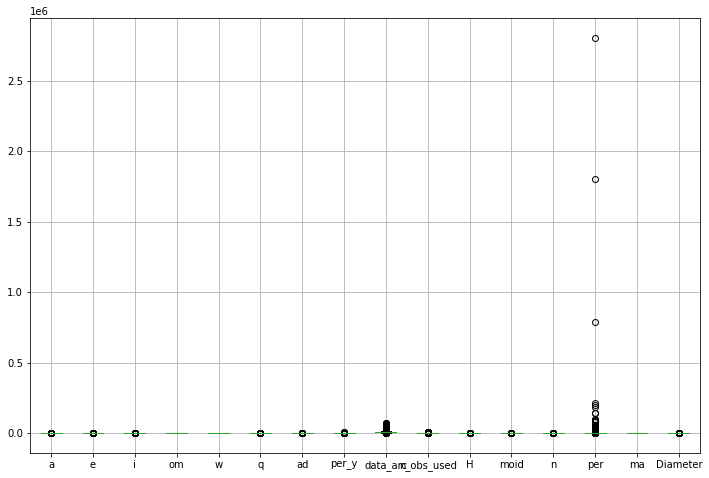

In [46]:
plt.figure(figsize=(12,8))
clean_dataset.boxplot()
plt.show()

The Feature 'per' contains very large outliers

### Detecting Outlier using Z-Score

In [47]:
outliers=[]
def detect_outliers(data):
    
    threshold=4
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [48]:
num_data = []
for ele in clean_dataset.columns:
    if clean_dataset[ele].dtype != 'object':
        num_data.append(ele)
print("Numeric Data :-> ", num_data)

Numeric Data :->  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma', 'Diameter']


In [49]:
# Number outliers from each section
for ele in num_data:
    outlier = detect_outliers(clean_dataset[ele])
    if len(outlier) > 0:
        print("Number of Outliers for", ele, ":--->", len(outlier))

Number of Outliers for a :---> 50
Number of Outliers for e :---> 649
Number of Outliers for i :---> 801
Number of Outliers for om :---> 801
Number of Outliers for w :---> 801
Number of Outliers for q :---> 2636
Number of Outliers for ad :---> 2685
Number of Outliers for per_y :---> 2705
Number of Outliers for data_arc :---> 4077
Number of Outliers for n_obs_used :---> 4272
Number of Outliers for H :---> 5036
Number of Outliers for moid :---> 6842
Number of Outliers for n :---> 7253
Number of Outliers for per :---> 7273
Number of Outliers for ma :---> 7273
Number of Outliers for Diameter :---> 8187


### Detecting and Treating outlier using InterQunatile Range

In [50]:
#Function to find Lower Limit and Upper Limit
def outlier_limits(col):
  Q3, Q1 = np.percentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

### Treating Outliers using Capping

In [51]:
new_df = pd.DataFrame()

In [52]:
for ele in num_data:
    UL, LL = outlier_limits(clean_dataset[ele])
    print(ele, "--->","Lower Limit :", round(LL), " | ","Upper Limit :", round(UL))
    clean_dataset[ele] =   np.where(clean_dataset[ele]>UL, 
                    UL, 
                    np.where(
                    clean_dataset[ele]<LL,
                    LL,
                    clean_dataset[ele]))

a ---> Lower Limit : 2.0  |  Upper Limit : 4.0
e ---> Lower Limit : -0.0  |  Upper Limit : 0.0
i ---> Lower Limit : -8.0  |  Upper Limit : 27.0
om ---> Lower Limit : -179.0  |  Upper Limit : 517.0
w ---> Lower Limit : -178.0  |  Upper Limit : 541.0
q ---> Lower Limit : 1.0  |  Upper Limit : 4.0
ad ---> Lower Limit : 2.0  |  Upper Limit : 4.0
per_y ---> Lower Limit : 2.0  |  Upper Limit : 8.0
data_arc ---> Lower Limit : 1134.0  |  Upper Limit : 14882.0
n_obs_used ---> Lower Limit : -938.0  |  Upper Limit : 2138.0
H ---> Lower Limit : 12.0  |  Upper Limit : 19.0
moid ---> Lower Limit : 0.0  |  Upper Limit : 3.0
n ---> Lower Limit : 0.0  |  Upper Limit : 0.0
per ---> Lower Limit : 710.0  |  Upper Limit : 2752.0
ma ---> Lower Limit : -171.0  |  Upper Limit : 537.0
Diameter ---> Lower Limit : -2.0  |  Upper Limit : 10.0


In [53]:
# Save Clean Dataset
clean_dataset.to_csv('Clean_Dataset.csv')